<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize
from keras.utils import to_categorical
from keras import regularizers
import pandas as pd
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
# mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
# mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

(X_train, y_train),(X_valid, y_valid) = mnist.load_data()

y_valid_r = y_valid.copy()
y_train_r = y_train.copy()
# Tensors Normalization
# X_train = normalize(X_train)
# y_train = normalize(y_train)

# X_valid = normalize(X_valid)
# y_valid = normalize(y_valid)

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32')/255

X_valid = X_valid.reshape((10000, 28, 28, 1))
X_valid = X_valid.astype('float32')/255

# label to categorical
y_train  = to_categorical(y_train)
y_valid  = to_categorical(y_valid)


# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

# X_valid = np.asarray(X_valid).astype('float32')
# y_valid = np.asarray(y_valid).astype('float32')

11493376/11490434 [==============================] - 1s 0us/step


In [32]:
y_valid_r.shape

(10000,)

VAlue Counts
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: categories, dtype: int64


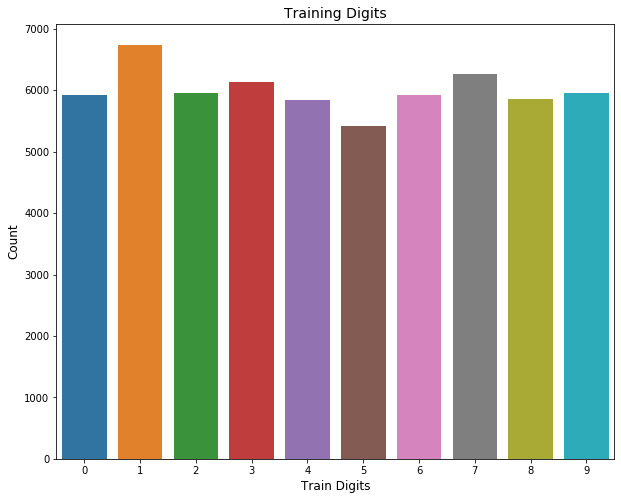

In [3]:
# Get the counts for each class in training data

cases_count = pd.DataFrame( y_train_r)
cases_count.columns = ['categories']
valuesCount = cases_count.categories.value_counts()

print('VAlue Counts\n', valuesCount)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=valuesCount.index, y= valuesCount.values)
plt.title('Training Digits', fontsize=14)
plt.xlabel('Train Digits', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

VAlue Counts
 1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: categories, dtype: int64


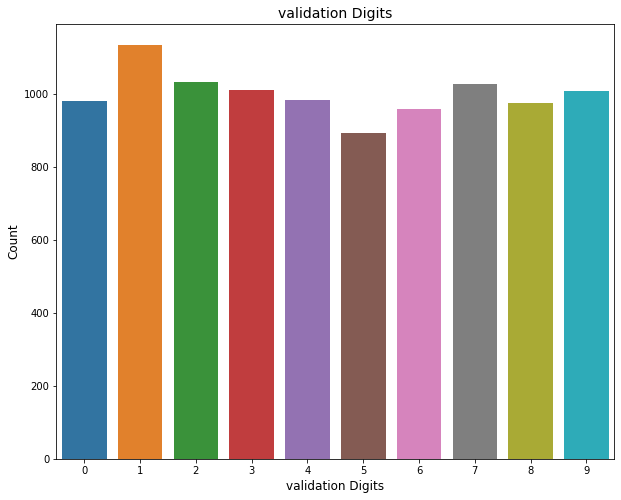

In [4]:

# Get the counts for each class in validation data
cases_count = pd.DataFrame( y_valid_r)
cases_count.columns = ['categories']
valuesCount = cases_count.categories.value_counts()

print('VAlue Counts\n', valuesCount)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=valuesCount.index, y= valuesCount.values)
plt.title('validation Digits', fontsize=14)
plt.xlabel('validation Digits', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [5]:
from keras import layers
from keras import models


covmodel = models.Sequential()
covmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=[28, 28, 1]))
covmodel.add(layers.MaxPooling2D((2, 2)))
covmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
covmodel.add(layers.MaxPooling2D((2, 2)))
covmodel.add(layers.Conv2D(64, (3,3), activation='relu'))

In [0]:
# covmodel.summary()

In [0]:
covmodel.add(layers.Flatten())
covmodel.add(layers.Dense(64, activation='relu'))
covmodel.add(layers.Dense(10, activation='softmax'))

In [7]:
covmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [8]:
covmodel.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [9]:
History = covmodel.fit(X_train, y_train, 
                       epochs=5, 
                       batch_size=128,
                       validation_data=(X_valid, y_valid) )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 50s 837us/step - loss: 0.2307 - acc: 0.9280 - val_loss: 0.0526 - val_acc: 0.9838
Epoch 2/5
60000/60000 [==============================] - 49s 822us/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.0343 - val_acc: 0.9891
Epoch 3/5
60000/60000 [==============================] - 49s 821us/step - loss: 0.0375 - acc: 0.9879 - val_loss: 0.0375 - val_acc: 0.9877
Epoch 4/5
60000/60000 [==============================] - 49s 819us/step - loss: 0.0290 - acc: 0.9905 - val_loss: 0.0281 - val_acc: 0.9916
Epoch 5/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.0232 - acc: 0.9931 - val_loss: 0.0363 - val_acc: 0.9895


In [0]:
# saving the model
covmodel.save('CNN_MNIST_MODEL.h5')

In [0]:
# test_acc = covmodel.evaluate(X_valid, y_valid)
# test_acc


In [0]:
History.history

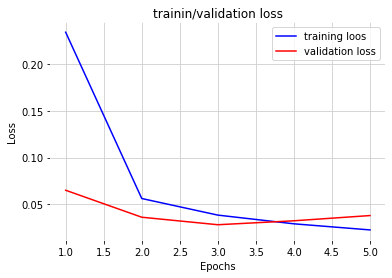

In [0]:
history_dict2 = History.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs = range(1, 5 + 1)
plt.plot(epochs, loss_values2, 'b-', label='training loos')
plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
plt.title('trainin/validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()

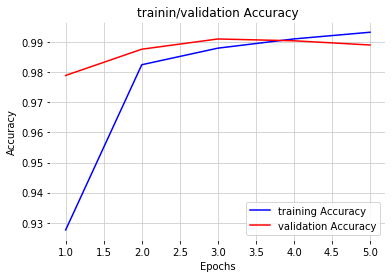

In [0]:
history_dict2 = History.history
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs = range(1, 5 + 1)
plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
plt.title('trainin/validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()

In [0]:
# loading the saved model
model = models.load_model('/content/CNN_MNIST_MODEL.h5')

In [29]:
# making prediction from validation data it is not a good idear by the way, just using it for the sake of example 
prediction = model.predict(X_valid)
i = 444
pred_label = np.argmax(prediction[i])
True_label = np.argmax(y_valid[i])
print('Pred_label  ', pred_label)
print('True_label  ', True_label)

Pred_label   2
True_label   2
